In [1]:
using Pkg
Pkg.activate(mktempdir())

Pkg.add([
    "Random",
    "Statistics",
    "LinearAlgebra",
    "Plots",
    "Flux"
])

Pkg.update()

  Activating new project at `C:\Users\79021\AppData\Local\Temp\jl_pZddfP`
    Updating registry at `C:\Users\79021\.julia\registries\General.toml`
   Resolving package versions...
   Installed OpenSSL ─── v1.6.1
   Installed Glib_jll ── v2.86.2+0
   Installed StatsAPI ── v1.8.0
   Installed Accessors ─ v0.1.43
  Installing 1 artifacts
   Installed artifact Glib                  7.6 MiB
    Updating `C:\Users\79021\AppData\Local\Temp\jl_pZddfP\Project.toml`
  [587475ba] + Flux v0.16.5
  [91a5bcdd] + Plots v1.41.2
  [10745b16] + Statistics v1.11.1
  [37e2e46d] + LinearAlgebra v1.12.0
  [9a3f8284] + Random v1.11.0
    Updating `C:\Users\79021\AppData\Local\Temp\jl_pZddfP\Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [7d9f7c33] + Accessors v0.1.43
  [79e6a3ab] + Adapt v4.4.0
  [66dad0bd] + AliasTables v1.1.3
  [dce04be8] + ArgCheck v2.5.0
  [a9b6321e] + Atomix v1.1.2
  [198e06fe] + BangBang v0.4.6
  [9718e550] + Baselet v0.1.1
  [d1d4a3ce] + BitFlags v0.1.9
  [082447d4] + ChainRules 

LEARNING PROCESS VISUALIZATION - BINARY CLASSIFICATION

Watching the network learn to separate two classes...

Epoch 1:
  Loss: 0.606956
Epoch 20:
  Loss: 0.428765
Epoch 40:
  Loss: 0.298399
  Layer 1 output range: [0.0, 2.436]
  Layer 2 output range: [0.0, 4.033]
  Prediction range: [0.412, 1.0]
  Gradient norms:
    Layer 1: 0.020232
    Layer 2: 0.032987
    Layer 3: 0.022906

Epoch 60:
  Loss: 0.228127
Epoch 80:
  Loss: 0.174548
  Layer 1 output range: [0.0, 2.669]
  Layer 2 output range: [0.0, 5.817]
  Prediction range: [0.279, 1.0]
  Gradient norms:
    Layer 1: 0.018583
    Layer 2: 0.030053
    Layer 3: 0.016073

Epoch 100:
  Loss: 0.103608
Epoch 120:
  Loss: 0.04753
  Layer 1 output range: [0.0, 3.163]
  Layer 2 output range: [0.0, 10.358]
  Prediction range: [0.028, 1.0]
  Gradient norms:
    Layer 1: 0.010242
    Layer 2: 0.030402
    Layer 3: 0.016243

Epoch 140:
  Loss: 0.023457
Epoch 160:
  Loss: 0.013637
  Layer 1 output range: [0.0, 3.525]
  Layer 2 output range: [0.0, 

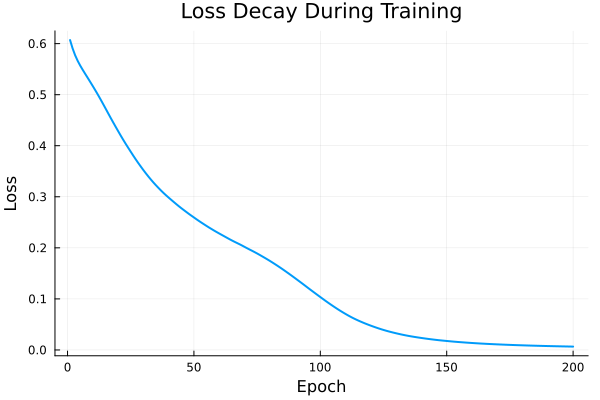

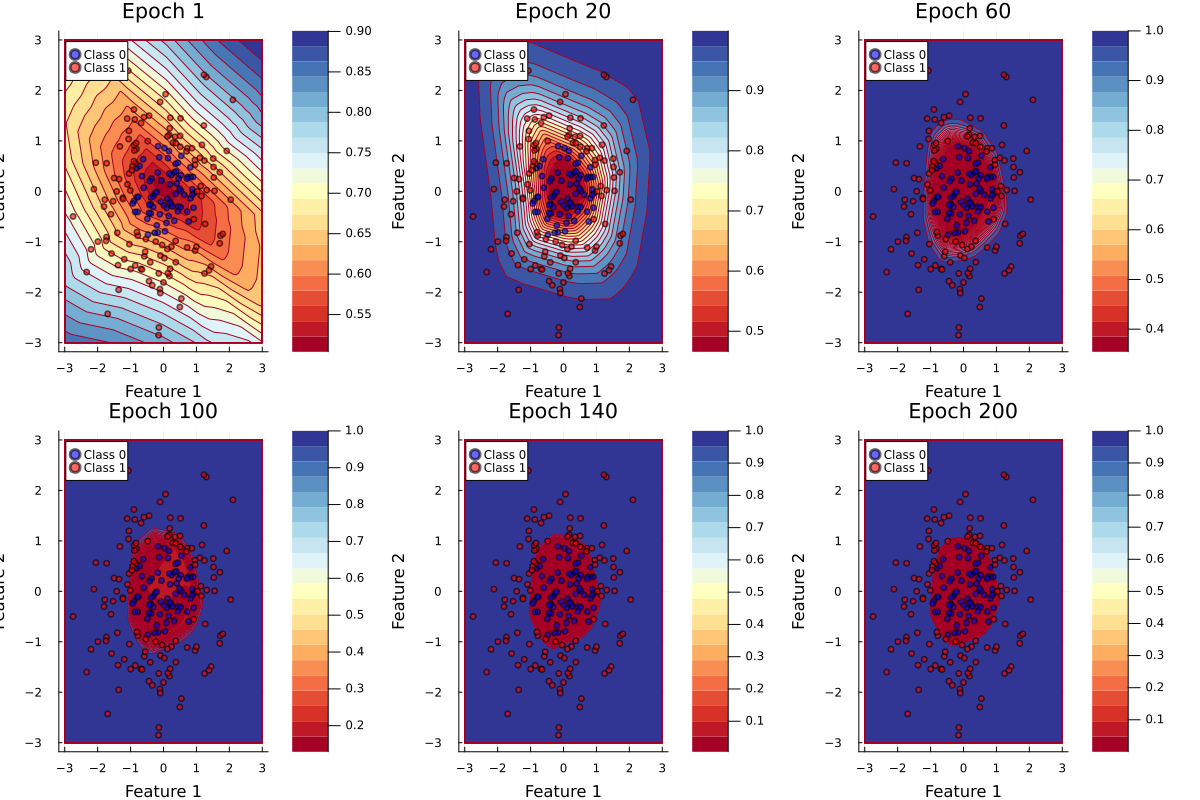

In [6]:
using Flux, Plots, Printf, Random

# Visualization of Learning Process for Binary Classification
function visualize_classification_learning()
    # Setup
    Random.seed!(42)
    n_samples = 200
    
    # Generate 2D data for easier visualization
    X = Float32.(randn(2, n_samples))
    y = Float32.((X[1,:].^2 + X[2,:].^2) .> 1.0)  # circular boundary
    
    # Create model
    model = Chain(
        Dense(2 => 16, relu),
        Dense(16 => 8, relu),
        Dense(8 => 1, σ)
    )
    
    opt_state = Flux.setup(Adam(0.01), model)
    
    # Storage for visualization
    losses = Float64[]
    decision_boundaries = []
    
    # Create grid for decision boundary
    x1_range = range(-3, 3, length=100)
    x2_range = range(-3, 3, length=100)
    grid_X = hcat([[x1, x2] for x1 in x1_range for x2 in x2_range]...)'
    
    println("=" ^ 80)
    println("LEARNING PROCESS VISUALIZATION - BINARY CLASSIFICATION")
    println("=" ^ 80)
    println("\nWatching the network learn to separate two classes...\n")
    
    # Training loop with visualization
    for epoch in 1:200
        # PHASE 1: FORWARD PROPAGATION
        # Data flows through network: X -> Layer1 -> Layer2 -> Layer3 -> predictions
        
        # PHASE 2: LOSS COMPUTATION
        # Measure error using binary cross-entropy
        loss_value = 0.0
        
        grads = gradient(model) do m
            ŷ = vec(m(X))
            loss_value = Flux.binarycrossentropy(ŷ, y)
        end
        
        # PHASE 3: BACKWARD PROPAGATION (handled by Flux's gradient)
        # Gradients flow backward: ∂L/∂ŷ -> ∂L/∂W³ -> ∂L/∂W² -> ∂L/∂W¹
        
        # PHASE 4: PARAMETER UPDATE
        # Update all weights using computed gradients
        Flux.update!(opt_state, model, grads[1])
        
        push!(losses, loss_value)
        
        # Store decision boundary every 20 epochs
        if epoch % 20 == 0 || epoch == 1
            grid_pred = vec(model(grid_X'))
            push!(decision_boundaries, reshape(grid_pred, 100, 100))
            
            # Print detailed status
            println("Epoch $epoch:")
            println("  Loss: $(round(loss_value, digits=6))")
            
            # Show what's happening inside
            if epoch % 40 == 0
                # Get intermediate activations
                layer1_out = model[1](X)
                layer2_out = model[2](layer1_out)
                
                println("  Layer 1 output range: [$(round(minimum(layer1_out), digits=3)), $(round(maximum(layer1_out), digits=3))]")
                println("  Layer 2 output range: [$(round(minimum(layer2_out), digits=3)), $(round(maximum(layer2_out), digits=3))]")
                println("  Prediction range: [$(round(minimum(vec(model(X))), digits=3)), $(round(maximum(vec(model(X))), digits=3))]")
                
                # Show gradient magnitudes
                W1_grad_norm = sqrt(sum(abs2, grads[1].layers[1].weight))
                W3_grad_norm = sqrt(sum(abs2, grads[1].layers[2].weight))
                W2_grad_norm = sqrt(sum(abs2, grads[1].layers[3].weight))
                
                println("  Gradient norms:")
                println("    Layer 1: $(round(W1_grad_norm, digits=6))")
                println("    Layer 2: $(round(W2_grad_norm, digits=6))")
                println("    Layer 3: $(round(W3_grad_norm, digits=6))")
                println()
            end
        end
    end
    
    # Plot results
    p1 = plot(losses, xlabel="Epoch", ylabel="Loss", 
              title="Loss Decay During Training", lw=2,
              legend=false, size=(600, 400))
    
    # Plot decision boundary evolution
    p2 = plot(layout=(2,3), size=(1200, 800))
    epochs_to_show = [1, 20, 60, 100, 140, 200]
    
    for (i, epoch_idx) in enumerate(epochs_to_show)
        idx = findfirst(x -> x >= epoch_idx, [1; collect(20:20:200)])
        
        if !isnothing(idx) && idx <= length(decision_boundaries)
            contourf!(p2[i], x1_range, x2_range, decision_boundaries[idx]',
                     levels=20, c=:RdYlBu, title="Epoch $(epoch_idx)",
                     xlabel="Feature 1", ylabel="Feature 2")
            
            # Overlay data points
            scatter!(p2[i], X[1, y.==0], X[2, y.==0], 
                    label="Class 0", color=:blue, ms=3, alpha=0.6)
            scatter!(p2[i], X[1, y.==1], X[2, y.==1], 
                    label="Class 1", color=:red, ms=3, alpha=0.6)
        end
    end
    
    display(p1)
    display(p2)
    
    println("\n" * "=" ^ 80)
    println("LEARNING COMPLETE!")
    println("=" ^ 80)
    println("\nWhat happened during learning:")
    println("1. Initially (epoch 1): Random weights → poor decision boundary")
    println("2. Gradients computed: Network learns which direction improves predictions")
    println("3. Weights updated: Decision boundary shifts toward correct separation")
    println("4. Process repeats: Boundary gradually conforms to circular pattern")
    println("\nFinal loss: $(round(losses[end], digits=6))")
end

# Run visualization
visualize_classification_learning()

In [7]:
using Flux, Plots, LinearAlgebra, Random

# Detailed visualization of gradient flow and weight changes
function visualize_gradient_flow()
    println("\n" * "=" ^ 80)
    println("GRADIENT FLOW AND WEIGHT UPDATE VISUALIZATION")
    println("=" ^ 80)
    
    # Simple network for clarity
    Random.seed!(123)
    model = Chain(
        Dense(2 => 4, relu),
        Dense(4 => 1, σ)
    )
    
    # Single training example
    x = Float32[1.0, 0.5]
    y = Float32(1.0)
    
    opt_state = Flux.setup(Adam(0.1), model)
    
    println("\nInitial Weights:")
    println("Layer 1 (W¹):\n", round.(model[1].weight, digits=3))
    println("Layer 1 (b¹): ", round.(model[1].bias, digits=3))
    println("Layer 2 (W²): ", round.(model[2].weight, digits=3))
    println("Layer 2 (b²): ", round.(model[2].bias, digits=3))
    
    # Forward pass with intermediate values
    println("\n" * "-" ^ 80)
    println("FORWARD PROPAGATION:")
    println("-" ^ 80)
    
    z1 = model[1].weight * x .+ model[1].bias
    println("\nz¹ = W¹x + b¹ = ", round.(z1, digits=4))
    
    a1 = max.(0, z1)  # ReLU
    println("a¹ = ReLU(z¹) = ", round.(a1, digits=4))
    
    z2 = model[2].weight * a1 .+ model[2].bias
    println("\nz² = W²a¹ + b² = ", round.(z2, digits=4))
    
    ŷ = 1 / (1 + exp(-z2[1]))  # sigmoid
    println("ŷ = σ(z²) = ", round(ŷ, digits=4))
    
    # Loss
    loss = -y * log(ŷ) - (1-y) * log(1-ŷ)
    println("\nLoss = BCE(ŷ, y) = ", round(loss, digits=6))
    
    # Backward pass
    println("\n" * "-" ^ 80)
    println("BACKWARD PROPAGATION (Gradient Computation):")
    println("-" ^ 80)
    
    # Compute gradients
    grads = gradient(model) do m
        Flux.binarycrossentropy(vec(m(reshape(x, :, 1))), [y])
    end
    
    println("\n∂L/∂ŷ = ŷ - y = ", round(ŷ - y, digits=6))
    println("δ² = ∂L/∂z² = (ŷ - y) · σ'(z²) = ", round(ŷ - y, digits=6))
    
    println("\n∂L/∂W² = δ² · (a¹)ᵀ:")
    println(round.(grads[1].layers[2].weight, digits=6))
    
    println("\n∂L/∂b² = δ²:")
    println(round.(grads[1].layers[2].bias, digits=6))
    
    # Show how gradient flows back to layer 1
    delta2 = ŷ - y
    delta1_pre = model[2].weight' * [delta2]
    relu_deriv = Float32.(z1 .> 0)  # ReLU derivative
    delta1 = delta1_pre .* relu_deriv
    
    println("\nδ¹ = (W²)ᵀδ² ⊙ ReLU'(z¹):")
    println("  (W²)ᵀδ² = ", round.(delta1_pre, digits=6))
    println("  ReLU'(z¹) = ", relu_deriv)
    println("  δ¹ = ", round.(delta1, digits=6))
    
    println("\n∂L/∂W¹ = δ¹ · xᵀ:")
    println(round.(grads[1].layers[1].weight, digits=6))
    
    # Parameter update
    println("\n" * "-" ^ 80)
    println("PARAMETER UPDATE (Adam Optimizer):")
    println("-" ^ 80)
    
    # Store old weights
    W1_old = copy(model[1].weight)
    W2_old = copy(model[2].weight)
    
    # Update
    Flux.update!(opt_state, model, grads[1])
    
    println("\nLayer 1 weight change:")
    println("ΔW¹ = ", round.(model[1].weight - W1_old, digits=6))
    
    println("\nLayer 2 weight change:")
    println("ΔW² = ", round.(model[2].weight - W2_old, digits=6))
    
    # Forward pass again to show improvement
    ŷ_new = vec(model(reshape(x, :, 1)))[1]
    loss_new = -y * log(ŷ_new) - (1-y) * log(1-ŷ_new)
    
    println("\n" * "=" ^ 80)
    println("RESULT OF ONE UPDATE STEP:")
    println("=" ^ 80)
    println("Prediction before: ", round(ŷ, digits=6))
    println("Prediction after:  ", round(ŷ_new, digits=6))
    println("Target:           ", y)
    println("\nLoss before: ", round(loss, digits=6))
    println("Loss after:  ", round(loss_new, digits=6))
    println("Loss reduction: ", round(loss - loss_new, digits=6))
end

visualize_gradient_flow()


GRADIENT FLOW AND WEIGHT UPDATE VISUALIZATION

Initial Weights:
Layer 1 (W¹):
Float32[-0.903 -0.977; 0.042 0.782; -0.332 0.806; 0.174 -0.618]
Layer 1 (b¹): Float32[0.0, 0.0, 0.0, 0.0]
Layer 2 (W²): Float32[-0.197 0.056 -0.704 -0.24]
Layer 2 (b²): Float32[0.0]

--------------------------------------------------------------------------------
FORWARD PROPAGATION:
--------------------------------------------------------------------------------

z¹ = W¹x + b¹ = Float32[-1.3914, 0.4333, 0.0708, -0.1355]
a¹ = ReLU(z¹) = Float32[0.0, 0.4333, 0.0708, 0.0]

z² = W²a¹ + b² = Float32[-0.0255]
ŷ = σ(z²) = 0.4936

Loss = BCE(ŷ, y) = 0.705983

--------------------------------------------------------------------------------
BACKWARD PROPAGATION (Gradient Computation):
--------------------------------------------------------------------------------

∂L/∂ŷ = ŷ - y = -0.506377
δ² = ∂L/∂z² = (ŷ - y) · σ'(z²) = -0.506377

∂L/∂W² = δ² · (a¹)ᵀ:
Float32[0.0 -0.219416 -0.035871 0.0]

∂L/∂b² = δ²:
Float32[-0.5